<a href="https://colab.research.google.com/github/jdy5294/Bigdata_Analyst/blob/main/4_1_%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC_%EC%9E%91%EC%97%85%ED%98%95_1%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 제1유형

#### 1-1.

airquality 데이터에 대해서 결측치가 가장 많은 변수를 찾아서 해당 결측치를 0으로 대치하고, 결측치를 제외한 평균과 0으로 대치한 후의 평균과의 차이를 구하시오.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


In [2]:
dfNan = df
print('결측치 제외 평균:', dfNan['Ozone'].mean())

df['Ozone'].fillna(0, inplace=True)
print('결측치 대치 평균:', df['Ozone'].mean())

결측치 제외 평균: 42.12931034482759
결측치 대치 평균: 31.941176470588236


#### 1-2.

Wind 변수에 대해서 Min_Max 정규화를 수행한 후 평균값과 Z 정규화를 수행한 후 평균값의 차이를 구하시오.

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [4]:
df['MinMax_Wind'] = MinMaxScaler().fit_transform(df[['Wind']])
df['Z_Wind'] = round((df['Wind'] - df['Wind'].mean()) / df['Wind'].std(), 2)
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,MinMax_Wind,Z_Wind
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,0.434606,-0.000719
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520,0.185421,1.000466
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000,-2.340000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000,0.300000,-0.730000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000,0.421053,-0.070000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000,0.515789,0.440000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000,3.050000


#### 1-3.

월별(5월~9월) 평균 기온을 구하시오.

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [6]:
df.groupby('Month').mean()[['Temp']]

,Temp
Month,
5,65.548387
6,79.100000
7,83.903226
8,83.967742
9,76.900000


### 2. 제2유형

데이터셋 : Bank_Personal_Loan_Modelling.csv

은행 고객 5,000명의 금융정보에 따른 대출여부가 들어있는 참조데이터를 이용하여 대출여부를 분류하는 가장 최적의 이웃의 크기값(k)을 구하고, 이때 분류정확도를 산출하시오.

(단, 참조데이터는 7:3비율로 트레이닝 데이터와 테스트 데이터로 구분하고, normalizer를 사용하여 스케일링을 진행한다.)

#### 2-1. 구글 드라이브 연동

In [7]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2-2. 데이터 불러오기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/drive/MyDrive/dataset/python_csv/Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### 2-2. 데이터 전처리

In [10]:
X = df.drop(['ID','ZIP Code','Personal Loan'], axis = 1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=1234)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [11]:
preprocessor = Normalizer()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#### 2-3. 데이터 분석 수행

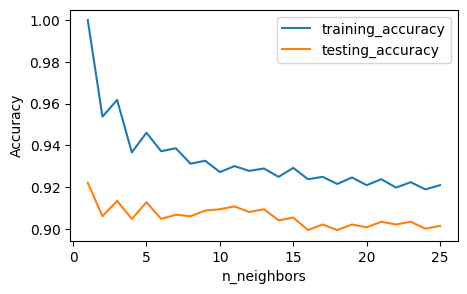

In [12]:
training_accuracy = []
testing_accuracy = []

for n in range(1,26):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  training_accuracy.append(accuracy_score(y_train, pred_train))
  testing_accuracy.append(accuracy_score(y_test, pred_test))

plt.figure(figsize=(5,3))
plt.plot(range(1,26), training_accuracy, label='training_accuracy')
plt.plot(range(1,26), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
testing_accuracy

[0.922,
 0.906,
 0.9133333333333333,
 0.9046666666666666,
 0.9126666666666666,
 0.9046666666666666,
 0.9066666666666666,
 0.906,
 0.9086666666666666,
 0.9093333333333333,
 0.9106666666666666,
 0.908,
 0.9093333333333333,
 0.904,
 0.9053333333333333,
 0.8993333333333333,
 0.902,
 0.8993333333333333,
 0.902,
 0.9006666666666666,
 0.9033333333333333,
 0.902,
 0.9033333333333333,
 0.9,
 0.9013333333333333]